In [1]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')
X = mnist.data.astype(float)
y = mnist.target.astype(int)

In [4]:
X -= np.mean(X, axis=0)

In [5]:
def pca(X, n_components):
    covariance_matrix = np.cov(X, rowvar=False)
    
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    principal_components = eigenvectors[:, :n_components]

    projected_data = np.dot(X, principal_components)
    
    return projected_data

In [6]:
n_components = 2
X_pca = pca(X, n_components)

In [7]:
import matplotlib.pyplot as plt

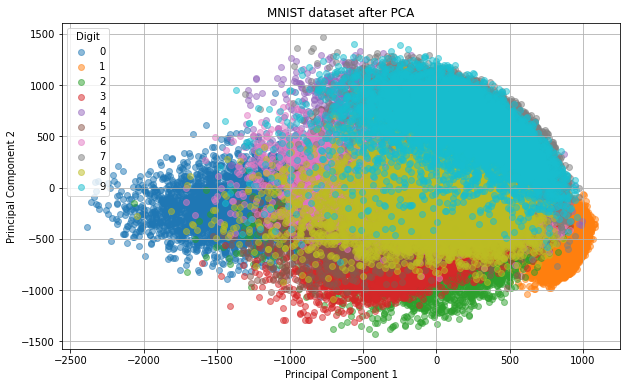

In [8]:
plt.figure(figsize=(10, 6))
for digit in range(10):
    plt.scatter(X_pca[y == digit, 0], X_pca[y == digit, 1], label=str(digit), alpha=0.5)
plt.title('MNIST dataset after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit')
plt.grid(True)
plt.show()